In [1]:
import xarray as xr

In [2]:
DS = xr.open_dataset('water.nc')


In [3]:
DS

<xarray.Dataset>
Dimensions:                        (time: 255, x: 866, y: 1218)
Coordinates:
  * y                              (y) float64 5.043e+06 5.043e+06 ... 5.007e+06
  * x                              (x) float64 6.127e+05 6.127e+05 ... 6.386e+05
  * time                           (time) datetime64[ns] 2019-09-22 ... 1984-...
Data variables:
    __xarray_dataarray_variable__  (time, y, x) float64 ...

In [4]:
DS.variables

Frozen({'y': <xarray.IndexVariable 'y' (y: 1218)>
array([5043060., 5043030., 5043000., ..., 5006610., 5006580., 5006550.]), 'x': <xarray.IndexVariable 'x' (x: 866)>
array([612690., 612720., 612750., ..., 638580., 638610., 638640.]), '__xarray_dataarray_variable__': <xarray.Variable (time: 255, y: 1218, x: 866)>
[268970940 values with dtype=float64], 'time': <xarray.IndexVariable 'time' (time: 255)>
array(['2019-09-22T00:00:00.000000000', '2019-09-06T00:00:00.000000000',
       '2019-08-29T00:00:00.000000000', ..., '1984-07-03T00:00:00.000000000',
       '1984-06-01T00:00:00.000000000', '1984-05-16T00:00:00.000000000'],
      dtype='datetime64[ns]')})

In [5]:
import matplotlib.pyplot as pyplot
from rasterio.plot import show

def my_plot(array,num):
    cmaps = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r']
    axs=()
    fig, axs = pyplot.subplots(4,4, figsize=(21,21))
    for i in range(0,4):
        for j in range(0,4):
            show(array, ax=axs[i][j], cmap=cmaps[i*4+j], title=cmaps[i*4+j])
    pyplot.show()

In [6]:
arr = DS.__xarray_dataarray_variable__[250].values

In [7]:
type(arr)

numpy.ndarray

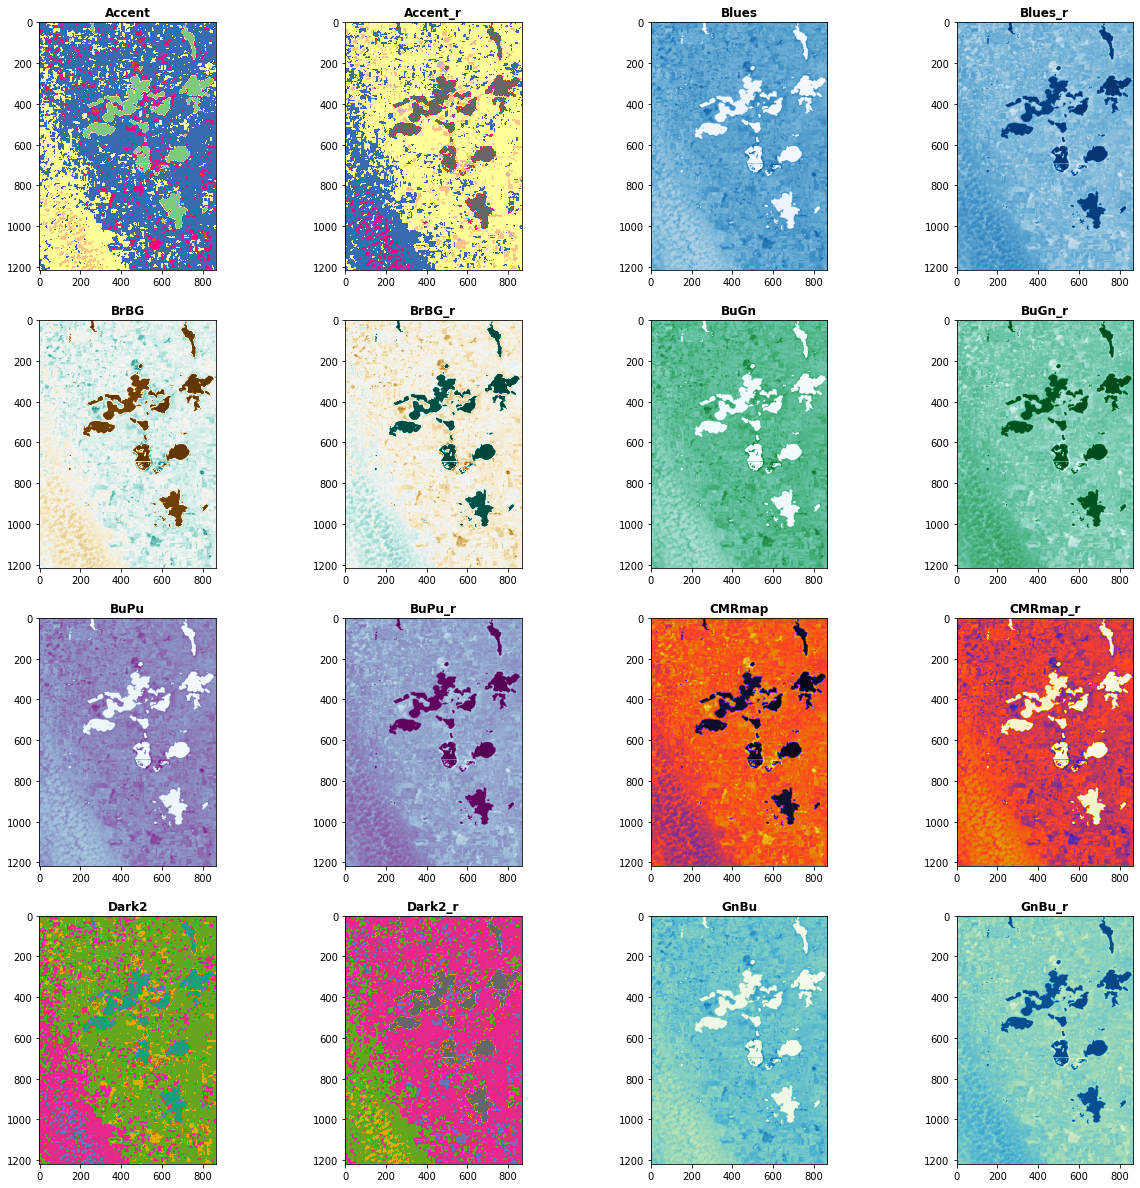

In [8]:
my_plot(arr,24)

In [9]:
# ds=DS.squeeze().drop(labels='__xarray_dataarray_variable__')
# ds=ds.to_dataset(name = 'NDWI')
DS = DS.rename({'__xarray_dataarray_variable__': 'ndwi'})

In [10]:
DS

<xarray.Dataset>
Dimensions:  (time: 255, x: 866, y: 1218)
Coordinates:
  * y        (y) float64 5.043e+06 5.043e+06 5.043e+06 ... 5.007e+06 5.007e+06
  * x        (x) float64 6.127e+05 6.127e+05 6.128e+05 ... 6.386e+05 6.386e+05
  * time     (time) datetime64[ns] 2019-09-22 2019-09-06 ... 1984-05-16
Data variables:
    ndwi     (time, y, x) float64 ...

In [11]:
arr2019_09_22 = DS.ndwi[0].values

In [12]:
type(arr2019_09_22)

numpy.ndarray

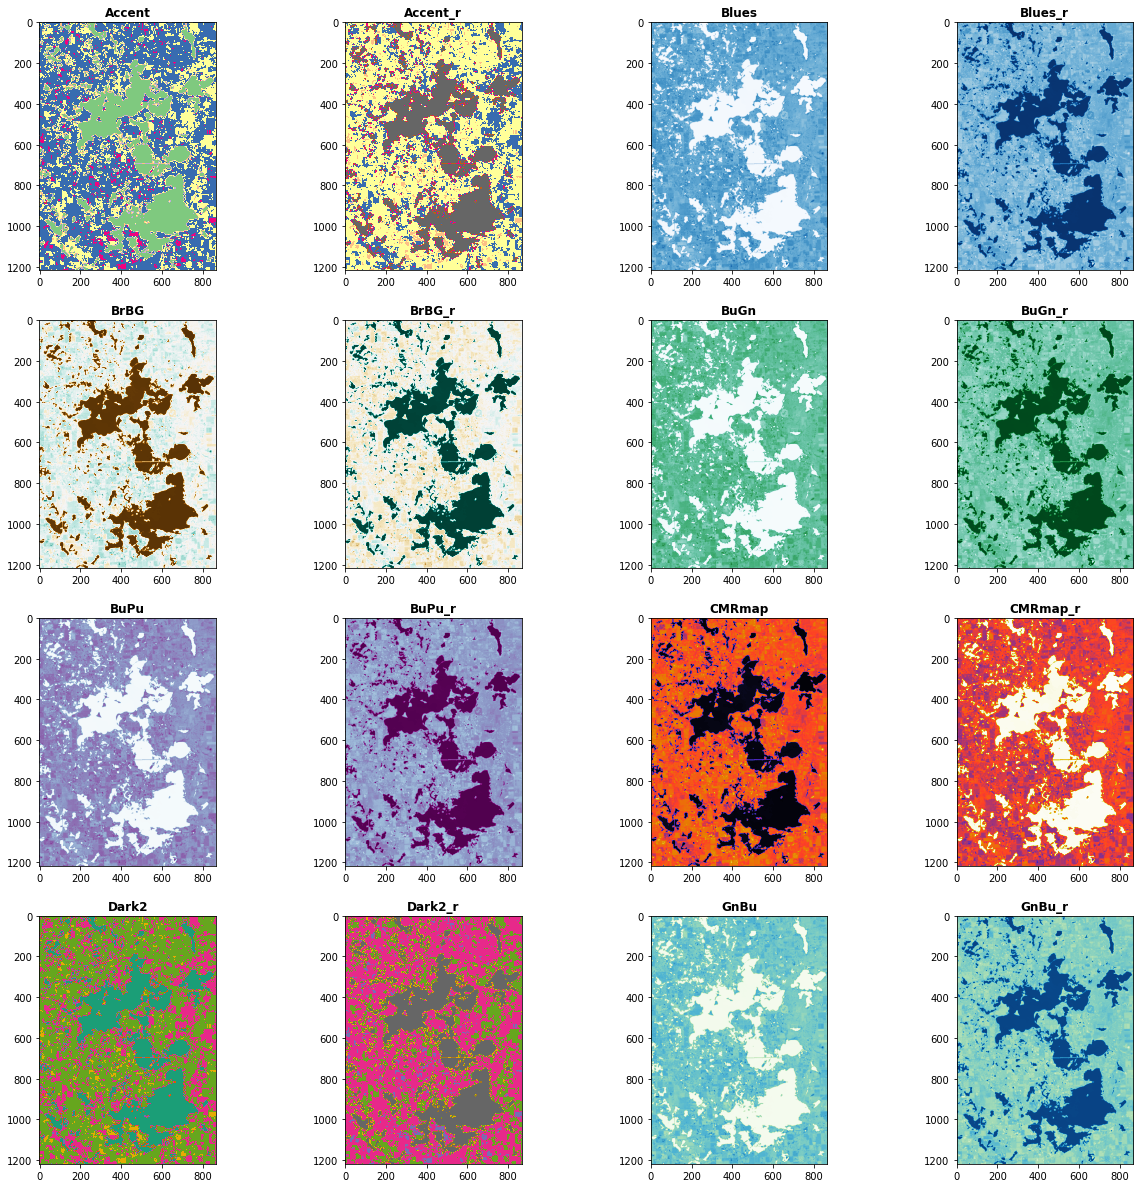

In [13]:
my_plot(arr2019_09_22,24)